# Strojové učenie

# Zdroje
[Encoding] - https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931

[Stromy] - http://scikit-learn.org/stable/modules/tree.html

# Knižnice

In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

import pydotplus
import collections

import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm

In [7]:
from sklearn.preprocessing import LabelEncoder

In [48]:
#Normalizujeme si kategoricke atributy na cisla
def encodeByNum(data):
    metadata = data.drop(['CLASS'], axis=1)
    columns = metadata.select_dtypes('object').columns
    metadata = pd.get_dummies(metadata, prefix=columns)
    metadata['CLASS'] = data['CLASS']
    metadata.info()
    return metadata

In [49]:
def init_dataset(file):
    # Načítame si súbor s datasetom so separátom ',' a ako index nastavime prvý stĺpec
    data = pd.read_csv(file, sep=',', index_col=0)
    
    metadata = data.drop(['DATE_OF_BIRTH', 'CLASS'], axis=1)
    col_names = metadata.select_dtypes('object').columns
    metadata['CLASS'] = data['CLASS']
    
    #print(metadata.info())
    return metadata

In [64]:
def getDataSets(train_file, test_file):

    train_data = init_dataset(train_file)
    test_data = init_dataset(test_file)

    #Ziskame si pocet trenovacich dat, aby sme vedeli podla, ktoreho indexu ich neskôr rozdelime
    train_rows_count = train_data.shape[0]

    data = pd.concat([train_data, test_data])
    data.reset_index(drop=True)

    #Transformacia kategorickych na numericke
    data = encodeByNum(data)
    
    #Rozdelenie dat naspat na vstupne datsety
    train_data = data.iloc[:train_rows_count,:]
    test_data = data.iloc[train_rows_count+1:,:]
    
    return train_data, test_data

In [11]:
#Zistime si dolezitost atributov
def get_important_features_names(data, clf):
    important_features = []
    for name, importance in zip(data.columns, clf.feature_importances_):
        if importance > 0:
            important_features.append(name)
    return important_features

In [12]:
def prediction(train_X, train_y, test_X, test_y, params):
    clf = DecisionTreeClassifier(**params)
    #Natrénujeme model
    clf = clf.fit(train_X, train_y)
    #Predikujeme triedu pre testovacie dáta
    y_pred = clf.predict(test_X)

    print(confusion_matrix(test_y, y_pred))
    print(classification_report(test_y, y_pred))
    return clf

# Doplnkové čistenie
- V tejto časti opisujeme doplnkove cistenie dat na zaklade revizie predchadzajuceho odovzdania

In [13]:
classifiers = pd.DataFrame() # tu sa budu ukladat vysledky jednotlivých klasifikatorov

## Transformacia kategorickych na numerické

In [70]:
file_median_train = 'data/clean_train_data/ctrain_median.csv'
file_modus_train = 'data/clean_train_data/ctrain_modus.csv'
file_mean_train = 'data/clean_train_data/ctrain_mean.csv'
file_knn_train = 'data/clean_train_data/ctrain_knn.csv'

file_median_test = 'data/clean_test_data/ctest_median.csv'
file_modus_test = 'data/clean_test_data/ctest_modus.csv'
file_mean_test = 'data/clean_test_data/ctest_mean.csv'
file_knn_test = 'data/clean_test_data/ctest_knn.csv'

In [72]:
data_median_train, data_median_test = getDataSets(file_median_train, file_median_test)
data_modus_train, data_modus_test = getDataSets(file_modus_train, file_modus_test)
data_mean_train, data_mean_test = getDataSets(file_mean_train, file_mean_test)
data_knn_train, data_knn_test = getDataSets(file_knn_train, file_knn_test)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3772 entries, 0 to 971
Data columns (total 79 columns):
AGE                                     3772 non-null float64
TSH                                     3772 non-null float64
T3                                      3772 non-null float64
TT4                                     3772 non-null float64
T4U                                     3772 non-null float64
FTI                                     3772 non-null float64
FNLWGT                                  3772 non-null float64
EDUCATION_NUM                           3772 non-null float64
CAPITAL_GAIN                            3772 non-null float64
CAPITAL_LOSS                            3772 non-null float64
HOURS_PER_WEEK                          3772 non-null float64
ON_THYROXINE                            3772 non-null bool
QUERY_ON_THYROXINE                      3772 non-null bool
ON_ANTITHYROID_MEDICATION               3772 non-null bool
SICK                               

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5600 entries, 0 to 2799
Data columns (total 79 columns):
AGE                                     5600 non-null float64
TSH                                     5600 non-null float64
T3                                      5600 non-null float64
TT4                                     5600 non-null float64
T4U                                     5600 non-null float64
FTI                                     5600 non-null float64
FNLWGT                                  5600 non-null float64
EDUCATION_NUM                           5600 non-null float64
CAPITAL_GAIN                            5600 non-null float64
CAPITAL_LOSS                            5600 non-null float64
HOURS_PER_WEEK                          5600 non-null float64
ON_THYROXINE                            5600 non-null bool
QUERY_ON_THYROXINE                      5600 non-null bool
ON_ANTITHYROID_MEDICATION               5600 non-null bool
SICK                              

In [60]:
#Inicializacia datasetu so zjednotenými nazvami
test_file = "data/zadanie4/ctest_revision.csv"
train_file = "data/zadanie4/ctrain.csv"

train_data = init_dataset(train_file)
test_data = init_dataset(test_file)

#Ziskame si pocet trenovacich dat, aby sme vedeli podla, ktoreho indexu ich neskôr rozdelime
train_rows_count = train_data.shape[0]

data = pd.concat([train_data, test_data])
data.reset_index(drop=True)

#Transformacia kategorickych na numericke
data = encodeByNum(data)

#Rozdelenie dat naspat na vstupne datsety
train_data = data.loc[:train_rows_count+1,:]
test_data = data.loc[train_rows_count:,:]

ValueError: labels ['DATE_OF_BIRTH' 'CLASS'] not contained in axis

In [68]:
data_median_test.describe()

,AGE,TSH,T3,TT4,T4U,FTI,FNLWGT,EDUCATION_NUM,CAPITAL_GAIN,CAPITAL_LOSS,...,JOB_SEGMENT_PRIVATE,JOB_SEGMENT_SELF_EMP_INC,JOB_SEGMENT_SELF_EMP_NOT_INC,JOB_SEGMENT_STATE_GOV,JOB_SEGMENT_WITHOUT_PAY,RACE_AMER_INDIAN_ESKIMO,RACE_ASIAN_PAC_ISLANDER,RACE_BLACK,RACE_OTHER,RACE_WHITE
count,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,...,971.000000,971.000000,971.000000,971.000000,971.0,971.000000,971.000000,971.000000,971.000000,971.000000
mean,51.406797,8.180160,6.716416,102.212822,2.669217,101.200360,185545.548919,10.037075,655.331462,49.853759,...,0.674562,0.024717,0.057673,0.047374,0.0,0.005149,0.033986,0.135942,0.012358,0.812564
std,18.969001,31.065176,11.242853,39.493721,6.444436,41.613879,102394.802417,2.468913,5056.576353,302.117396,...,0.468780,0.155341,0.233243,0.212547,0.0,0.071611,0.181285,0.342904,0.110536,0.390462
min,7.000000,0.005000,0.200000,2.900000,0.250000,2.800000,21755.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.600000,1.650000,83.000000,0.880000,86.500000,115861.000000,9.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
50%,54.000000,1.500000,2.100000,101.000000,0.990000,104.000000,175398.000000,10.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
75%,67.000000,3.900000,2.900000,121.500000,1.130000,121.000000,227954.500000,12.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
max,93.000000,530.000000,88.000000,372.000000,60.000000,291.000000,858091.000000,16.000000,99999.000000,2444.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [306]:
#Rozdelenie dat na atribúty, ktoré budú trénované na predikovanie triedy
train_X = train_data.drop('CLASS', axis=1)
train_y = train_data['CLASS']
#Rozdelenie testovacich dat na predikciu a porovnanie vysledkov predikcie
test_X = test_data.drop('CLASS', axis=1)
test_y = test_data['CLASS']

# Zistujeme najlepsie parametre a atributy

In [307]:
#Vytvoríme decision tree
clf = DecisionTreeClassifier(random_state=0)

#Nastavujeme hyperparametre
cv_params = {'max_depth': [num**2 for num in range(2,10)], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [num**2 for num in range(2,10)]}
ind_params = {'random_state': 0}
optimization = GridSearchCV(clf,
                            cv_params, 
                             scoring = 'f1_macro', cv = 5, n_jobs = -1, verbose=True) 


In [308]:
%%time
optimization.fit(train_X, train_y)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:113

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:113

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:113

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:113

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:113

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:113

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:113

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:113

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:113

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:113

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:113

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


CPU times: user 1.74 s, sys: 367 ms, total: 2.1 s
Wall time: 15.7 s


[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:   15.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [4, 9, 16, 25, 36, 49, 64, 81], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [4, 9, 16, 25, 36, 49, 64, 81]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_macro', verbose=True)

In [309]:
list(filter(lambda x: 'best' in x, dir(optimization)))

['best_estimator_', 'best_index_', 'best_params_', 'best_score_']

In [310]:
# Zistime si najlepsie parametre pre DecisionTree
best_params = optimization.best_params_

In [311]:
# Zistime najlepsie skore pre nase testovacie data
best_score = optimization.best_score_

In [312]:
# Zistime si najlepsie atributy
best_features = get_important_features_names(train_X, optimization.best_estimator_)

In [313]:
#Natrenovanie modelu podla zistených
train_best_data = train_X.loc[:, best_features]
test_best_data = test_X.loc[:, best_features]
# TODO
result = prediction(train_best_data, train_y, test_best_data, test_y, best_params)

[[935   0   2   0]
 [  0  10   1   0]
 [  3   3   3   0]
 [  0   0   0  17]]
                     precision    recall  f1-score   support

           NEGATIVE       1.00      1.00      1.00       937
    OVERREPLACEMENT       0.77      0.91      0.83        11
REPLACEMENT_THERAPY       0.50      0.33      0.40         9
   UNDERREPLACEMENT       1.00      1.00      1.00        17

        avg / total       0.99      0.99      0.99       974



In [314]:
test_best_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 2798 to 971
Data columns (total 5 columns):
AGE             974 non-null float64
ON_THYROXINE    974 non-null bool
TSH             974 non-null float64
T4U_MEASURED    974 non-null bool
FTI             974 non-null float64
dtypes: bool(2), float64(3)
memory usage: 72.3 KB


In [315]:
print("Predikovanie na trenovacich datach: ",result.score(train_best_data, train_y))
print("Predikovanie na testovacich datach: ",result.score(test_best_data, test_y))
classifiers = classifiers.append([["Decision tree", result.score(train_best_data, train_y), result.score(test_best_data, test_y)]])

Predikovanie na trenovacich datach:  0.994639027877055
Predikovanie na testovacich datach:  0.9907597535934292


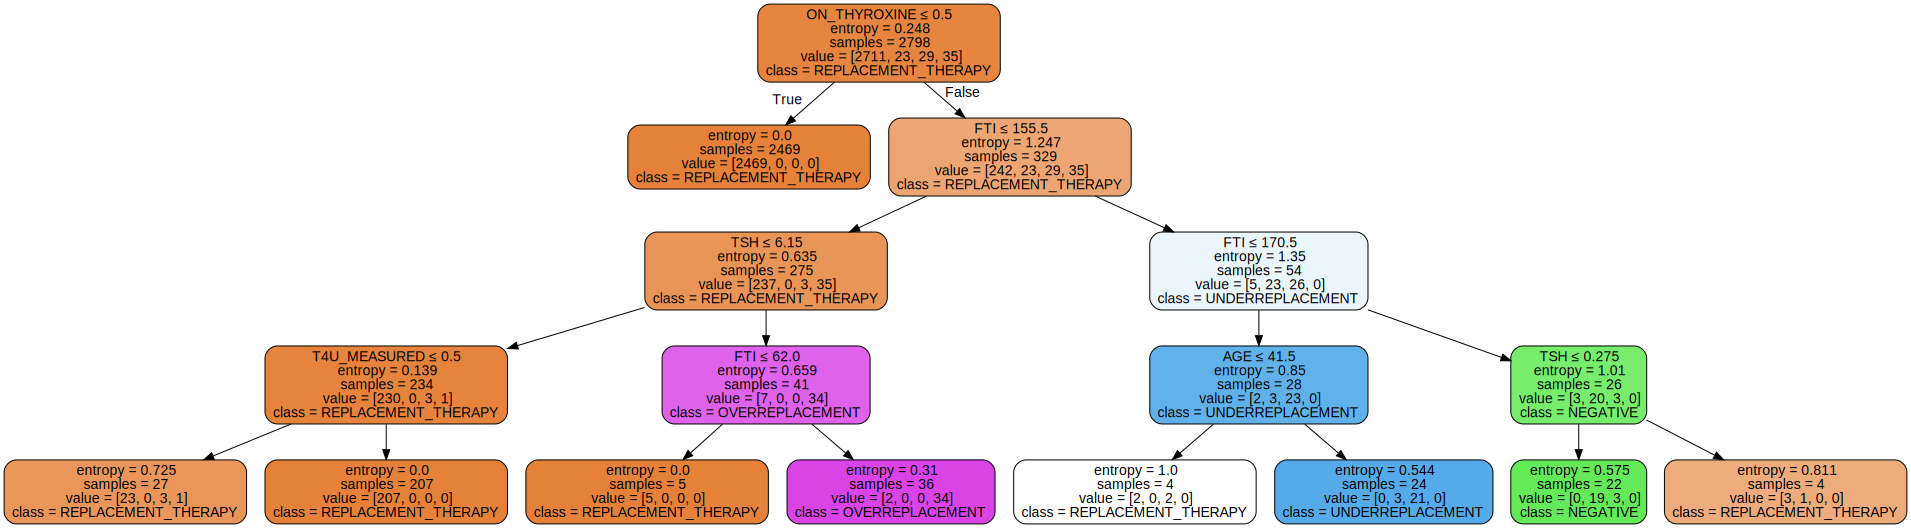

In [317]:
# Visualize data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(result, out_file=None, 
                         feature_names=best_features,  
                         class_names=train_y.unique(),  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("img/tree_best") 
graph

# KNN klasifikátor

In [318]:
cls = KNeighborsClassifier(6)
cls.fit(train_X, train_y)
y_pred_train = cls.predict(train_X)
y_pred_test = cls.predict(test_X)
print(cls)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')


In [319]:
print("Predikovanie na trenovacich datach: ",accuracy_score(train_y, y_pred_train))
print("Predikovanie na testovacich datach: ",accuracy_score(test_y, y_pred_test))
classifiers = classifiers.append([["KNeighbors", accuracy_score(train_y, y_pred_train), accuracy_score(test_y, y_pred_test)]])

Predikovanie na trenovacich datach:  0.9689063616869192
Predikovanie na testovacich datach:  0.9620123203285421


In [320]:
print(confusion_matrix(test_y, y_pred_test))
print(classification_report(test_y, y_pred_test))

[[937   0   0   0]
 [ 11   0   0   0]
 [  9   0   0   0]
 [ 17   0   0   0]]
                     precision    recall  f1-score   support

           NEGATIVE       0.96      1.00      0.98       937
    OVERREPLACEMENT       0.00      0.00      0.00        11
REPLACEMENT_THERAPY       0.00      0.00      0.00         9
   UNDERREPLACEMENT       0.00      0.00      0.00        17

        avg / total       0.93      0.96      0.94       974



/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Random Forest Classifier

In [326]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

cls = RandomForestClassifier(n_estimators=100, random_state=0)
cls.fit(train_X, train_y)
print(cls)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


In [327]:
print("Accuracy na train zložke: {:f}".format(cls.score(train_X, train_y)))
print("Accuracy na test zložke: {:f}".format(cls.score(test_X, test_y)))


Accuracy na train zložke: 1.000000
Accuracy na test zložke: 0.974333


In [338]:
test_preds = cls.predict(test_X)

In [339]:
classifiers = classifiers.append([["Random Forest", accuracy_score(train_y, train_preds), cls.score(test_X, test_y)]])

In [341]:
print(classification_report(test_y, test_preds))

                     precision    recall  f1-score   support

           NEGATIVE       0.98      1.00      0.99       937
    OVERREPLACEMENT       0.73      0.73      0.73        11
REPLACEMENT_THERAPY       1.00      0.22      0.36         9
   UNDERREPLACEMENT       1.00      0.12      0.21        17

        avg / total       0.97      0.97      0.97       974



In [342]:
for est in cls.estimators_:
    dot_data = export_graphviz(est, out_file=None,  
                             class_names=train_y.unique(),  
                             filled=True, rounded=True,  
                             special_characters=True)  
    graph = graphviz.Source(dot_data)  
    graph.render("img/random_forest") 

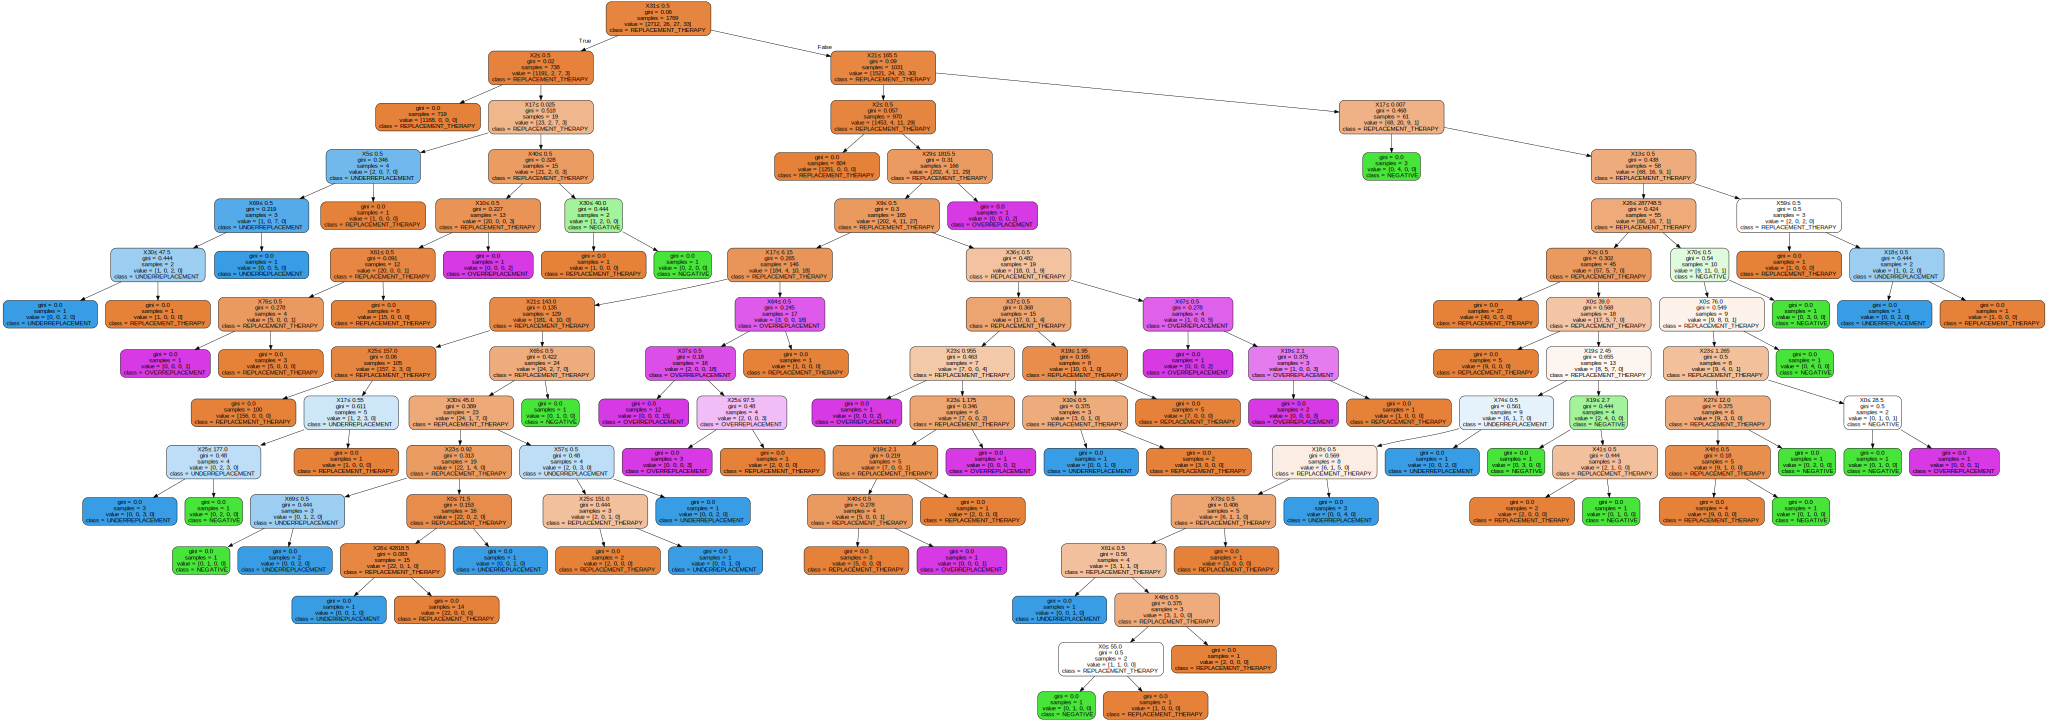

In [343]:
graph

# Porovnanie klasifikátorov

V tejto časti sa budeme venovať porovnaniu výsledkov jednotlivých klasifikátorov. 

In [253]:
classifiers.columns = ['CLASSIFIER_NAME', 'TRAIN_ACCURACY', 'TEST_ACCURACY']
classifiers

,CLASSIFIER_NAME,TRAIN_ACCURACY,TEST_ACCURACY
0,Decision tree,0.994639,0.990760
0,KNeighbors,0.968906,0.962012
0,Random Forest,0.998570,0.974333
